# Heart Disease project on ML 
`Auther`: [Syed Muhammad Zain Sultan]()\
`Date`: 8/29/2024\
`Data Set`: [HCI Heart Disease](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data)

## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

## Content

### Column Descriptions:
1. `id` (Unique id for each patient)
2. `age` (Age of the patient in years)
3. `origin` (place of study)
4. `sex` (Male/Female)
5. `cp chest pain type` ([typical angina, atypical angina, non-anginal, asymptomatic])
6. `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
7. `chol` (serum cholesterol in mg/dl)
8. `fbs` (if fasting blood sugar > 120 mg/dl)
9. `restecg` (resting electrocardiographic results)
-- Values: [normal, stt abnormality, lv hypertrophy]
10. `thalach`: maximum heart rate achieved
11. `exang`: exercise-induced angina (True/ False)
12. `oldpeak`: ST depression induced by exercise relative to rest
13. `slope`: the slope of the peak exercise ST segment
14. `ca`: number of major vessels (0-3) colored by fluoroscopy
15. `thal`: [normal; fixed defect; reversible defect]
16. `num`: the predicted attribute

## Acknowledgements
### Creators:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [65]:
# Data handling 
import pandas as pa 
import numpy as np
# Data visualization  
import seaborn as sb
import matplotlib.pyplot as pl
import plotly.express as pe

# Data Pre_processing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

#import iterative imputer 
from  sklearn.experimental import enable_iterative_imputer
from  sklearn.impute import IterativeImputer

# machine learning 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
# model 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
#  classification 

from sklearn.metrics import accuracy_score,confusion_matrix, consensus_score

from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error





In [66]:
df=pa.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# check each colum one by one 

In [68]:
df.shape

(920, 16)

<Axes: ylabel='Count'>

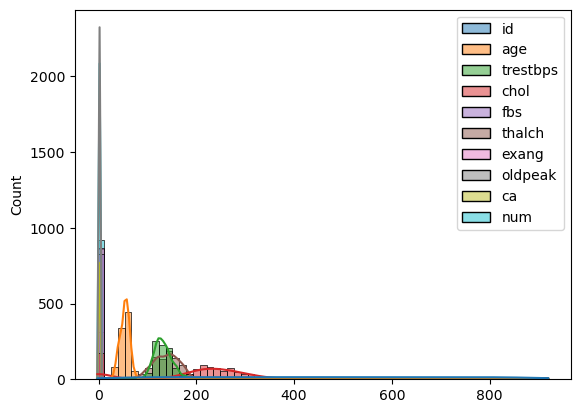

In [69]:
sb.histplot(df, kde=True)

In [70]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


<Axes: >

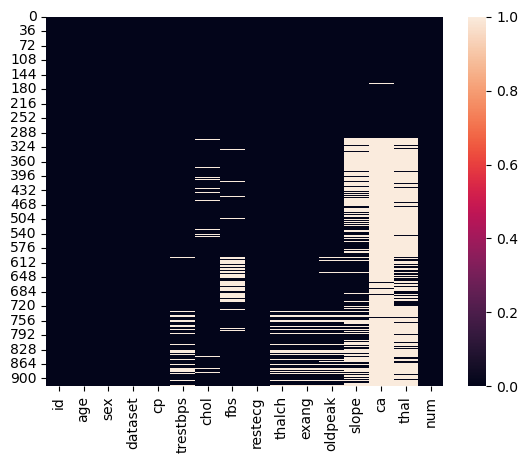

In [71]:
sb.heatmap(df.isnull())

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# We are going to remove missing value 

In [73]:
# Impute null values
imputer = IterativeImputer(random_state=42, max_iter=10)
df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']] = imputer.fit_transform(df[['trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']])

# Check for remaining null values
null_count = df.isnull().sum()
print(null_count)

id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs          90
restecg       2
thalch        0
exang        55
oldpeak       0
slope       309
ca            0
thal        486
num           0
dtype: int64


In [74]:
#  Know we are going deal with catgorical 
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [75]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [76]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [77]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pa.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pa.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [78]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [79]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 66.3 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 67.48 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [80]:
# Check for remaining null values
null_count = df.isnull().sum()
print(f"Number of null values in 'trestbps': {null_count}")

Number of null values in 'trestbps': id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


# Age

In [81]:
df['age'].isnull().sum()

0

<Axes: xlabel='age', ylabel='Count'>

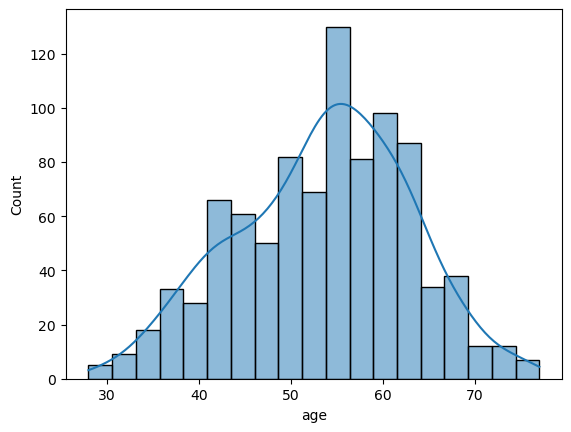

In [82]:
sb.histplot(df['age'], kde=True)

In [83]:
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

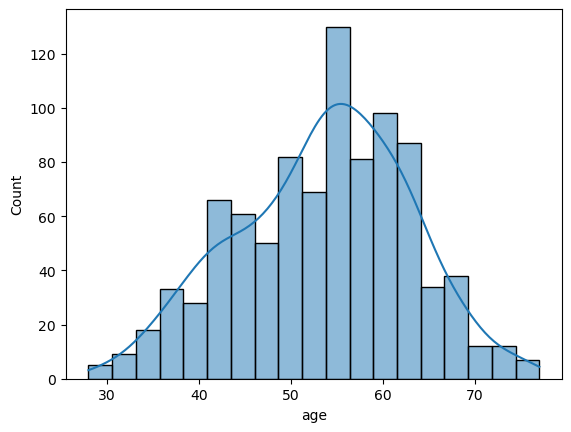

In [84]:
#  draw  a histogram to see the distribution of age of column
sb.histplot(df['age'], kde=True)


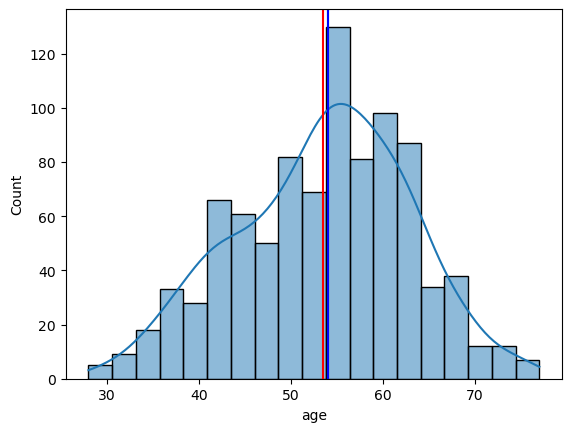

mean: 53.51086956521739
mode: 0    54
Name: age, dtype: int64
median: 54.0


In [85]:
sb.histplot(df['age'], kde=True)
pl.axvline(df['age'].mean(),color='red')
pl.axvline(df['age'].mode()[0],color='green')
pl.axvline(df['age'].median(),color='blue')
pl.show()
print('mean:',df['age'].mean())
print('mode:',df['age'].mode())
print('median:',df['age'].median())

In [86]:
# polt histogram using plotly by using age and sex fro diifer 
fig=pe.histogram(data_frame=df, x='age', color='sex')
fig.show()

SEX

In [87]:
df['sex'].isnull().sum()

0

In [88]:
df['sex'].max(),df['sex'].min()


('Male', 'Female')

<Axes: xlabel='sex', ylabel='Count'>

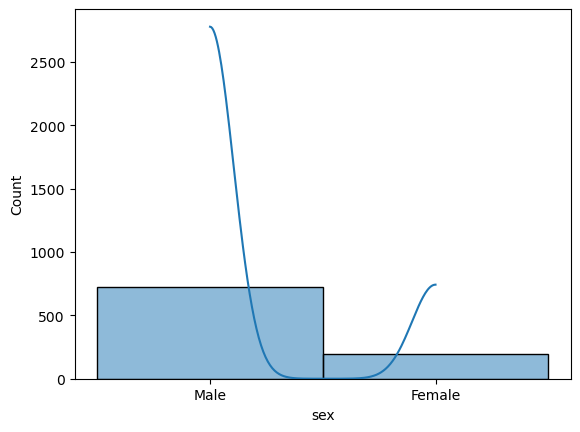

In [89]:
sb.histplot(df['sex'], kde=True)

In [90]:
male_count = df[df['sex'] == 'Male'].shape[0]
female_count = df[df['sex'] == 'Female'].shape[0]

# Calculate the total number of entries
total_count = df.shape[0]

# Calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# Print the results
print(f"Percentage of males: {male_percentage:.2f}%")
print(f"Percentage of females: {female_percentage:.2f}%")

Percentage of males: 78.91%
Percentage of females: 21.09%


In [91]:
# Define custom color sequence
custom_colors = ['#636EFA', '#EF553B']  # Blue for Male, Red for Female

# Create a bar chart using Plotly Express with custom colors
fig = pe.bar(df, x='sex', color='sex', title='Count of Each Sex in the Dataset',
             color_discrete_sequence=custom_colors)

# Show the plot
fig.show()

Dataset 

In [92]:
df['dataset'].isnull().sum()

0

In [93]:
df['dataset'].max(),df['dataset'].min()

('VA Long Beach', 'Cleveland')

<Axes: xlabel='sex', ylabel='Count'>

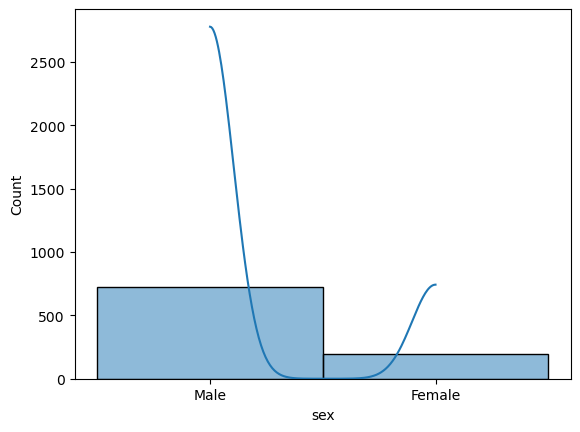

In [94]:
sb.histplot(df['sex'], kde=True)

In [95]:
fig = pe.scatter(df, x='dataset', y='age', color='sex', title='Relationship between Age and Sex on base of area')

# Show the plot
fig.show()

In [96]:
# Filter the dataset for females
female_df = df[df['sex'] == 'Female']

# Calculate the number of females from Switzerland
num_females_switzerland = female_df[female_df['dataset'] == 'Switzerland'].shape[0]

num_females_Hungary = female_df[female_df['dataset'] == 'Hungary'].shape[0]
num_females_cleveland = female_df[female_df['dataset'] == 'Cleveland'].shape[0]
num_females_VALongBeach = female_df[female_df['dataset'] == 'VA Long Beach'].shape[0]
# Calculate the total number of females
total_females = female_df.shape[0]

# Calculate the percentage
percentage_females_switzerland = (num_females_switzerland / total_females) * 100
percentage_females_Hungary = (num_females_Hungary / total_females) * 100
percentage_females_cleveland = (num_females_cleveland / total_females) * 100
percentage_females_VALongBeach= (num_females_VALongBeach / total_females) * 100

print(f"Percentage of females from Switzerland: {percentage_females_switzerland:.2f}%")
print(f"Percentage of females from Hungary: {percentage_females_Hungary:.2f}%")
print(f"Percentage of females from cleveland: {percentage_females_cleveland:.2f}%")
print(f"Percentage of females from VA Long Beach: {percentage_females_VALongBeach:.2f}%")

Percentage of females from Switzerland: 5.15%
Percentage of females from Hungary: 41.75%
Percentage of females from cleveland: 50.00%
Percentage of females from VA Long Beach: 3.09%


In [97]:
# Filter the dataset for females
Male_df = df[df['sex'] == 'Male']

# Calculate the number of females from Switzerland
num_Male_switzerland = Male_df[Male_df['dataset'] == 'Switzerland'].shape[0]

num_Male_Hungary = Male_df[Male_df['dataset'] == 'Hungary'].shape[0]
num_Male_cleveland = Male_df[Male_df['dataset'] == 'Cleveland'].shape[0]
num_Male_VALongBeach = Male_df[Male_df['dataset'] == 'VA Long Beach'].shape[0]
# Calculate the total number of females
total_Male = Male_df.shape[0]

# Calculate the percentage
percentage_Male_switzerland = (num_Male_switzerland / total_Male) * 100
percentage_Male_Hungary = (num_Male_Hungary / total_Male) * 100
percentage_Male_cleveland = (num_Male_cleveland / total_Male) * 100
percentage_Male_VALongBeach= (num_Male_VALongBeach / total_Male) * 100

print(f"Percentage of Male from Switzerland: {percentage_Male_switzerland:.2f}%")
print(f"Percentage of Male from Hungary: {percentage_Male_Hungary:.2f}%")
print(f"Percentage of Male from cleveland: {percentage_Male_cleveland:.2f}%")
print(f"Percentage of Male from VA Long Beach: {percentage_Male_VALongBeach:.2f}%")

Percentage of Male from Switzerland: 15.56%
Percentage of Male from Hungary: 29.20%
Percentage of Male from cleveland: 28.51%
Percentage of Male from VA Long Beach: 26.72%


### CP(Chest Pain type)

In [98]:
df['cp'].isnull().sum()

0

In [99]:
df['cp'].max(),df['cp'].min()


('typical angina', 'asymptomatic')

<Axes: xlabel='cp', ylabel='Count'>

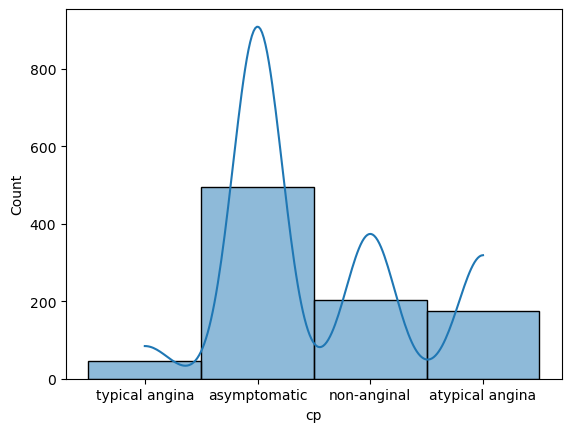

In [100]:
sb.histplot(df['cp'], kde=True)

In [101]:
# Group by country and chest pain type
grouped = df.groupby(['dataset', 'cp']).size().reset_index(name='count')

# Display the result
for country in grouped['dataset'].unique():
    print(f"Country: {country}")
    country_data = grouped[grouped['dataset'] == country]
    for _, row in country_data.iterrows():
        print(f"  cancer type : {row['cp']} - Count: {row['count']}")


Country: Cleveland
  cancer type : asymptomatic - Count: 144
  cancer type : atypical angina - Count: 51
  cancer type : non-anginal - Count: 86
  cancer type : typical angina - Count: 23
Country: Hungary
  cancer type : asymptomatic - Count: 123
  cancer type : atypical angina - Count: 105
  cancer type : non-anginal - Count: 54
  cancer type : typical angina - Count: 11
Country: Switzerland
  cancer type : asymptomatic - Count: 98
  cancer type : atypical angina - Count: 4
  cancer type : non-anginal - Count: 17
  cancer type : typical angina - Count: 4
Country: VA Long Beach
  cancer type : asymptomatic - Count: 131
  cancer type : atypical angina - Count: 14
  cancer type : non-anginal - Count: 47
  cancer type : typical angina - Count: 8


In [102]:
import pandas as pd
import plotly.graph_objects as go
# Group by country, chest pain type, and age
grouped = df.groupby(['dataset', 'cp', 'age']).size().reset_index(name='count')

# Group by country, chest pain type, and age
# Create a 3D-like bar plot
fig = go.Figure()

for cp_type in grouped['cp'].unique():
    cp_data = grouped[grouped['cp'] == cp_type]
    fig.add_trace(go.Bar(
        x=cp_data['dataset'],
        y=cp_data['count'],
        name=cp_type,
        text=cp_data['age'],
        textposition='auto'
    ))

fig.update_layout(
    title='Chest Pain Types by Country and Age',
    xaxis_title='dataset',
    yaxis_title='age',
    barmode='group'
)

# Show the plot
fig.show()

### trestbps(resting blood pressure)

In [103]:
df['trestbps'].isnull().sum()

0

In [104]:
# Deal with null values that are null
imputer = IterativeImputer(random_state=42, max_iter=10)
df['trestbps'] = imputer.fit_transform(df[['trestbps']])

# Check for remaining null values
null_count = df['trestbps'].isnull().sum()
print(f"Number of null values in 'trestbps': {null_count}")

Number of null values in 'trestbps': 0


In [105]:
df['trestbps'].max(),df['trestbps'].min()

(200.0, 0.0)

<Axes: xlabel='trestbps', ylabel='Count'>

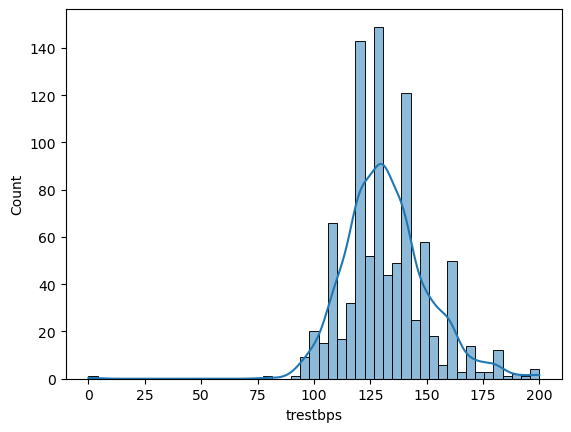

In [106]:
sb.histplot(df['trestbps'], kde=True)

In [107]:
# Group by age and calculate the mean blood pressure for each age
age_grouped = df.groupby('age')['trestbps'].mean().reset_index()

# Find the age with the highest average blood pressure
max_bp_age = age_grouped.loc[age_grouped['trestbps'].idxmax()]

print(f"Age with the highest average blood pressure: {max_bp_age['age']}")
print(f"Average blood pressure at this age: {max_bp_age['trestbps']}")

Age with the highest average blood pressure: 30.0
Average blood pressure at this age: 170.0


In [108]:

age_sex_grouped = df.groupby(['age', 'sex'])['trestbps'].mean().reset_index()

# Create a bar chart with hue for sex
fig = pe.bar(age_sex_grouped, x='age', y='trestbps', color='sex',
             title='Average Blood Pressure by Age and Sex',
             labels={'age': 'Age', 'trestbps': 'Average Blood Pressure', 'sex': 'Sex'},
             barmode='group')

# Show the plot
fig.show()

### Chol

In [109]:
df['chol'].max(),df['chol'].min()

(603.0, 0.0)

<Axes: xlabel='chol', ylabel='Count'>

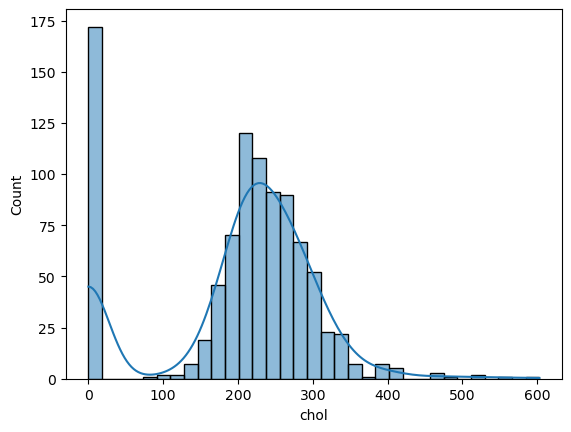

In [110]:
sb.histplot(df['chol'], kde=True)

### fbs

In [111]:
df['fbs'].max(),df['fbs'].min()

(True, False)

<Axes: xlabel='fbs', ylabel='Count'>

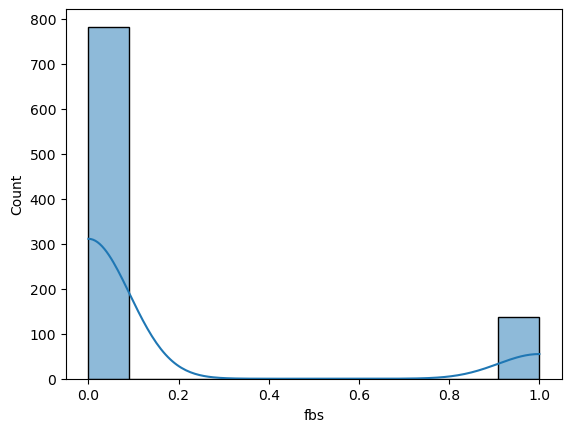

In [112]:
sb.histplot(df['fbs'], kde=True)

In [113]:
df['thalch'].max(),df['thalch'].min()

(202.0, 60.0)

<Axes: xlabel='thalch', ylabel='Count'>

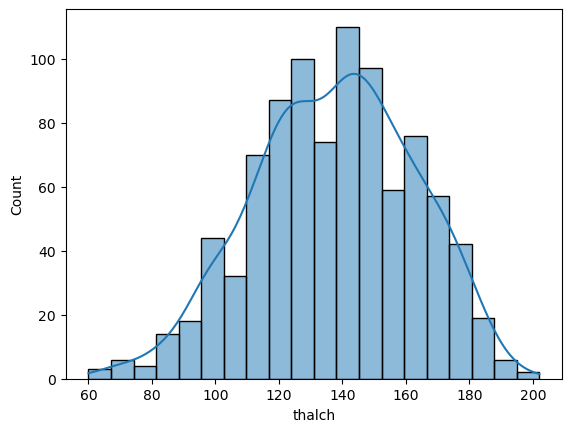

In [114]:
sb.histplot(df['thalch'], kde=True)

### exang

In [115]:
df['exang'].max(),df['exang'].min()

(True, False)

<Axes: xlabel='exang', ylabel='Count'>

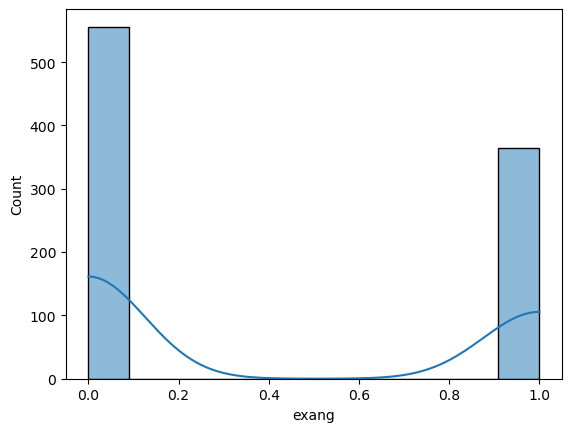

In [116]:
sb.histplot(df['exang'], kde=True)

In [117]:
((df.isnull().sum())/len(df))*100

id          0.0
age         0.0
sex         0.0
dataset     0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

Check all Data set is normal or not 

<Axes: ylabel='Count'>

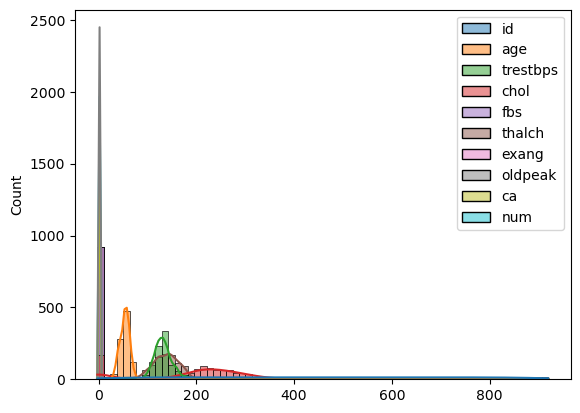

In [118]:
sb.histplot(df, kde=True)

<Axes: >

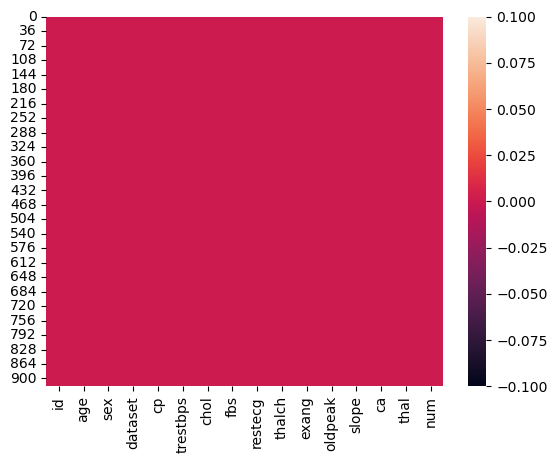

In [119]:
sb.heatmap(df.isnull())

# Now we are going to deal with outlier 

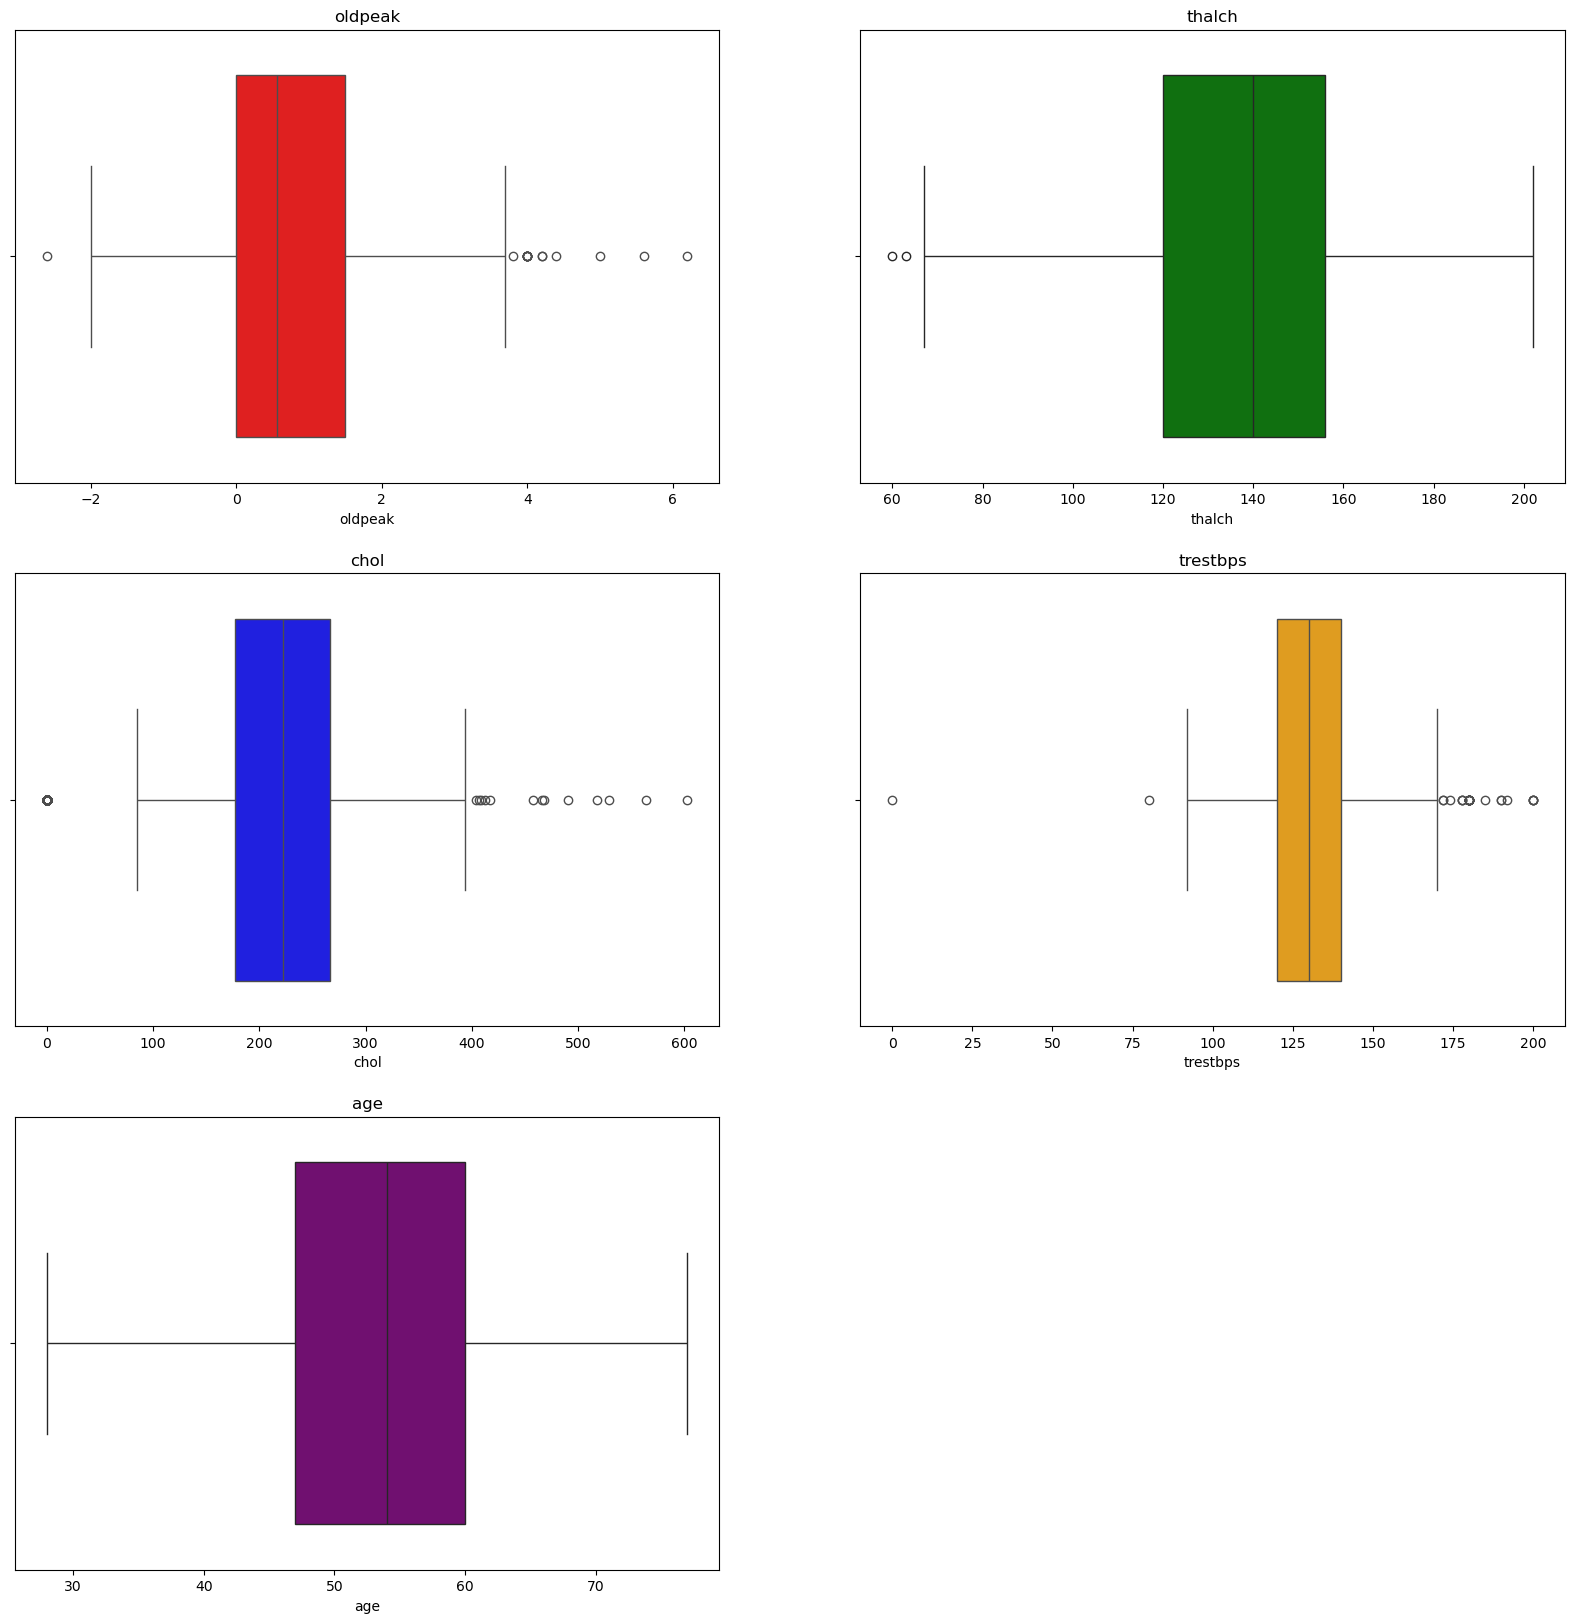

In [120]:
# create box plots for all numeric columns using for loop and subplot
pl.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    pl.subplot(3, 2, i+1)
    sb.boxplot(x=df[col], color=colors[i])
    pl.title(col)
pl.show()

In [121]:
# make box plots of all the numeric columns using for loop and plotly
fig = pe.box(data_frame=df, y='age')
fig.show()

fig = pe.box(data_frame=df, y='trestbps')
fig.show()

fig = pe.box(data_frame=df, y='chol')
fig.show()

fig = pe.box(data_frame=df, y='thalch')
fig.show()

fig = pe.box(data_frame=df, y='oldpeak')
fig.show()

In [122]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [123]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0.0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2.0
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1.0
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0.0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0.0


# Now we are going to use ML Model 

In [124]:
df['num'].value_counts()

num
0.0    411
1.0    265
2.0    109
3.0    106
4.0     28
Name: count, dtype: int64

In [125]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [126]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [127]:
# Create a list of models to evaluate 

models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100,  criterion='gini', max_depth=1000, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=1000, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=True, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
    # ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    # ('Support Vector Machine', SVC(random_state=42)),
    # ('Logistic Regression', LogisticRegression(random_state=42)),
    # ('K-Nearest Neighbors', KNeighborsClassifier()),
    # ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    # ('Ada Boost', AdaBoostClassifier(random_state=42)),
    # ('XG Boost', XGBClassifier(random_state=42)),
    # ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, params in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# Save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))


Model: Random Forest
Cross-validation Accuracy: 0.8180838178294574
Test Accuracy: 0.8297101449275363

Best Model: Pipeline(steps=[('model',
                 RandomForestClassifier(max_depth=1000, max_leaf_nodes=1000,
                                        n_jobs=True, random_state=42))])


In [128]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.model_selection import cross_val_score, GridSearchCV
# from sklearn.metrics import accuracy_score

# models = [
#      ('Random Forest', RandomForestClassifier(n_estimators=100,  criterion='gini', max_depth=1000, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=1000, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=True, random_state=42, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None), {'n_estimators': [10, 100, 1000], 'max_depth': [None, 5, 10]}),
#     # Add other models and their hyperparameters here
# ]

# best_model = None
# best_accuracy = 0.0

# # Iterate over the models and evaluate their performance
# for name, model, params in models:
#     # Create a pipeline for each model
#     pipeline = Pipeline([
#         ('imputer', SimpleImputer(strategy='most_frequent')),
#         ('encoder', OneHotEncoder(handle_unknown='ignore')),
#         ('model', model)
#     ])
    
#     # Perform hyperparameter tuning with GridSearchCV
#     grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)
#     grid_search.fit(X_train, y_train)
    
#     # Get the best model from GridSearchCV
#     best_pipeline = grid_search.best_estimator_
    
#     # Make predictions on the test data
#     y_pred = best_pipeline.predict(X_test)
    
#     # Calculate accuracy score
#     accuracy = accuracy_score(y_test, y_pred)
    
#     # Print the performance metrics
#     print("Model:", name)
#     print("Best Parameters:", grid_search.best_params_)
#     print("Test Accuracy:", accuracy)
#     print()
    
#     # Check if the current model has the best accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = best_pipeline

# # Retrieve the best model
# print("Best Model:", best_model)


1. insight is this the starting age is 28 and ending age ,range of cancer people  between 28 to 77   
2. Most of female have cancer at the age of 54 to 55.

2. most of male have a cancer 
* Percentage of males: 78.91%
* Percentage of females: 21.09%

3. Most people have  `typical angina` type of pain most, and some people have  `asymptomatic` type of pain most 

4.  blood pressure  between 200 to 0.0
 * Most of people have fasting blood sugar > 120 mg/dl 
 * Age with the highest average blood pressure: 30.0
 * Average blood pressure at this age: 170.0

5. Serum cholesterol in mg/dl in range of (603.0 to 0)

6. Heart rate achieved range have 202 to 60 

7. Most people of `'VA Long Beach'` have cancer and lowest people `Cleveland`.
* Female of `hungry` and `Cleveland` and Male of `VA Long Beach` and `switzerland` are most effected from the cancer according.\
`In given data ratio of cancer for  male and female on base of total female and male in data set.`
* Percentage of females from Switzerland: 5.15%
* Percentage of females from Hungary: 41.75%
* Percentage of females from cleveland: 50.00%
* Percentage of females from VA Long Beach: 3.09%
* Percentage of Male from Switzerland: 15.56%
* Percentage of Male from Hungary: 29.20%
* Percentage of Male from cleveland: 28.51%
* Percentage of Male from VA Long Beach: 26.72%